#Week 11

Sharon Tan 0706022310024

## Import Library

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [38]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


# Data Preparation

In [39]:
# describe data
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [40]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [41]:
df = df.rename(columns={
    'Tot\xa0Cases//1M pop': 'Total Cases/1M Population',
    'Tot\xa0Deaths/1M pop': 'Total Deaths/1M Population'
})

In [42]:
df[df["Country"] != df["Other names"]]


,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage
23,Bolivia,Bolivia (Plurinational State of),BOL,11951714,Latin America and the Caribbean,902448,21896,75508,1832,2.426289
28,Brunei,Brunei Darussalam,BRN,444812,Asia,135974,213,305689,479,0.156648
36,CAR,Central African Republic,CAF,4976719,Africa,14649,113,2944,23,0.771384
37,Caribbean Netherlands,"Bonaire, Sint Eustatius and Saba",BES,26650,Latin America and the Caribbean,8574,33,321726,1238,0.384885
40,Channel Islands,Guernsey,GGY,176668,Europe,69036,156,390767,883,0.225969
52,Czechia,Czech Republic,CZE,10743762,Europe,3830631,39720,356545,3697,1.036905
67,Falkland Islands,Falkland Islands (Malvinas),FLK,3657,Latin America and the Caribbean,123,0,33634,0,0.000000
89,Hong Kong,"China, Hong Kong Special Administrative Region",HKG,7603455,Asia,1171422,8172,154064,1075,0.697614
94,Iran,United Kingdom,IRN,85874667,Asia,7167646,140315,83466,1634,1.957616
100,Ivory Coast,CÃ´te d'Ivoire,CIV,27520953,Africa,81761,796,2971,29,0.973569


In [43]:
(df["Country"] == df["Other names"]).value_counts(dropna=False)


,count
True,191
False,34


In [44]:
df = df.drop(columns=['Other names'])
# Dropping 'other names' because it's just an alternative name (mostly same as country name)



In [45]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Country                       0
ISO 3166-1 alpha-3 CODE       0
Population                    0
Continent                     0
Total Cases                   0
Total Deaths                  0
Total Cases/1M Population     0
Total Deaths/1M Population    0
Death percentage              0
dtype: int64


In [46]:
# Check for inconsistent values in object columns
object_cols = df.select_dtypes(include='object').columns

print("\nUnique values in object columns:")
for col in object_cols:
    print(f"\n'{col}':")
    print(df[col].unique())


Unique values in object columns:

'Country':
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei ' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'CAR' 'Caribbean Netherlands' 'Cayman Islands' 'Chad'
 'Channel Islands' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo'
 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czechia'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Democratic Republic of the Congo' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland' 'France'
 'French Guiana' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Gi

In [47]:
# Display duplicate rows
df[df.duplicated(keep=False)]

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage


##Exploratory Data Analysis (EDA)

In [48]:
# World Map Visualization
import plotly.express as px

fig = px.choropleth(df,
                    locations="ISO 3166-1 alpha-3 CODE",
                    color="Continent",
                    hover_name="Country",
                    projection="natural earth",
                    title="World Map of Countries by Continent"
)
fig.show()

Interpretation:
The choropleth map shows how countries are distributed across different continents, with each region represented by a distinct color.

1. Countries are clearly clustered by geographic regions, helping us quickly see which nations belong to each continent. This is important for comparing COVID-19 patterns across large regions such as Asia, Europe, and Africa.

2. Latin America and the Caribbean form a distinct block separate from Northern America, showing that the Americas are divided into two different regions in this dataset—useful for more region-specific COVID analysis.

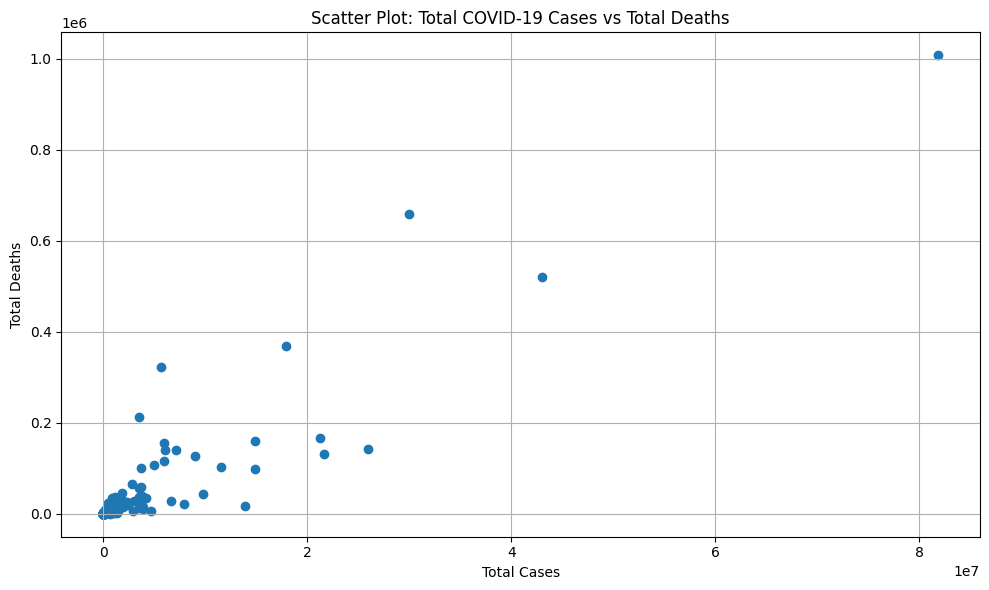

In [49]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df["Total Cases"], df["Total Deaths"])
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.title("Scatter Plot: Total COVID-19 Cases vs Total Deaths")
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation:**

1. There is a strong positive relationship between total COVID-19 cases and total deaths. Countries with more confirmed cases generally report higher numbers of deaths, which is expected because a larger infected population increases the likelihood of severe outcomes.

2. A few countries act as extreme outliers, with very high cases and deaths compared to the rest (e.g., countries with tens of millions of cases). These outliers stretch the scale, causing most smaller countries to cluster near the origin.

3. The majority of countries fall within a lower-case, lower-death range, indicating that only a small number of nations experienced extremely large outbreaks. This pattern may reflect differences in population size, healthcare capacity, or pandemic management strategies.

## Data Transformation

In [50]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OrdinalEncoder

# Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['Continent']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'Continent': {'Africa': 0,
               'Asia': 1,
               'Europe': 2,
               'Latin America and the Caribbean': 3,
               'Northern America': 4,
               'Oceania': 5}}


,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage
150,Norway,NOR,5495449,2.0,1408708,2518,256341,458,0.178745
41,Chile,CHL,19403451,3.0,3486653,56750,179692,2925,1.627635
178,Serbia,SRB,8675762,2.0,1980722,15825,228305,1824,0.798951
162,Qatar,QAT,2807805,1.0,361819,677,128862,241,0.187110
31,Burundi,BDI,12510155,0.0,38519,38,3079,3,0.098653


In [51]:
df_encoded.info()

# All features used for clustering are numeric.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     225 non-null    object 
 1   ISO 3166-1 alpha-3 CODE     225 non-null    object 
 2   Population                  225 non-null    int64  
 3   Continent                   225 non-null    float64
 4   Total Cases                 225 non-null    int64  
 5   Total Deaths                225 non-null    int64  
 6   Total Cases/1M Population   225 non-null    int64  
 7   Total Deaths/1M Population  225 non-null    int64  
 8   Death percentage            225 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 15.9+ KB


In [52]:
df_model = df_encoded.drop(columns=['Country',
                                    'ISO 3166-1 alpha-3 CODE']).copy()

# Drop Country and ISO 3166-1 alpha-3 CODE because its only label

In [53]:
df_model.dtypes

,0
Population,int64
Continent,float64
Total Cases,int64
Total Deaths,int64
Total Cases/1M Population,int64
Total Deaths/1M Population,int64
Death percentage,float64


In [54]:
# Numerical Columns
num_cols = ['Population', 'Total Cases', 'Total Deaths', 'Total Cases/1M Population', 'Total Deaths/1M Population', 'Death percentage']

# Categorical Columns
cat_cols = ['Continent']

sc = StandardScaler()

df_scaled_num = pd.DataFrame(sc.fit_transform(df[num_cols]), columns=num_cols)
df_model = pd.concat([df_scaled_num, df_model[cat_cols].reset_index(drop=True)], axis=1)
df_model.head()

,Population,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage,Continent
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,1.0
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,2.0
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,0.0
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,2.0
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,0.0


In [55]:
# get stastical information on the new dataset
df_model.describe()

,Population,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage,Continent
count,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,225.000000
mean,-1.578984e-17,2.713879e-17,8.881784e-18,7.894919e-17,4.736952e-17,2.131628e-16,1.751111
std,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00,1.476093
min,-2.524428e-01,-3.009443e-01,-2.839181e-01,-9.457898e-01,-9.192494e-01,-8.309821e-01,0.000000
25%,-2.483707e-01,-2.976287e-01,-2.819631e-01,-8.671993e-01,-8.161528e-01,-5.367737e-01,0.000000
50%,-2.105007e-01,-2.783629e-01,-2.635925e-01,-3.310361e-01,-3.258152e-01,-2.343236e-01,2.000000
75%,-9.477552e-02,-1.504507e-01,-1.426217e-01,5.971815e-01,5.852909e-01,3.066382e-01,3.000000
max,1.010746e+01,1.097204e+01,1.014493e+01,3.863153e+00,4.349575e+00,9.613966e+00,5.000000


## Modeling

### K Means

In [56]:
from sklearn.cluster import KMeans

In [57]:
df_KMeans = df_model.copy()

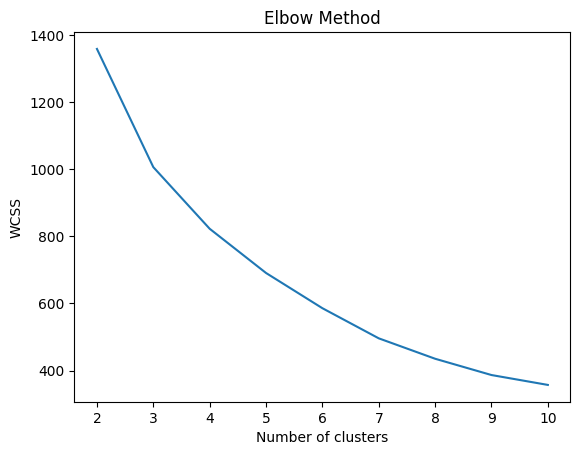

In [58]:
wcss = []
for i in range(2, 11):   #clusters 2-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_KMeans)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(2, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   2  1357.921919
1                   3  1005.938854
2                   4   822.409390
3                   5   690.698659
4                   6   585.817789
5                   7   496.095972
6                   8   435.311756
7                   9   386.825189
8                  10   357.382521


In [60]:
!pip install kneed
from kneed import KneeLocator

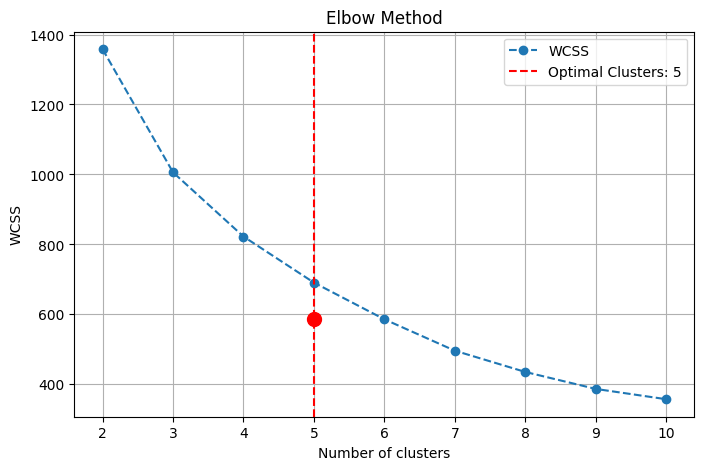

The optimal number of clusters is: 5


In [61]:
# Example WCSS values and cluster numbers
clusters = range(2, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [62]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_KMeans)

# Add the cluster labels to the DataFrame
df['KMeans Cluster'] = clusters

# Show the df
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage,KMeans Cluster
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,0
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,1
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,0
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,2
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,0


In [63]:
ss_Kmeans = silhouette_score(df_KMeans, clusters)
print(ss_Kmeans)

0.37692350736781033


### Hierarchical Agglomerative Clustering

In [64]:
df_agglo = df_model.copy()

Skipping Ward linkage with Manhattan metric (not supported).


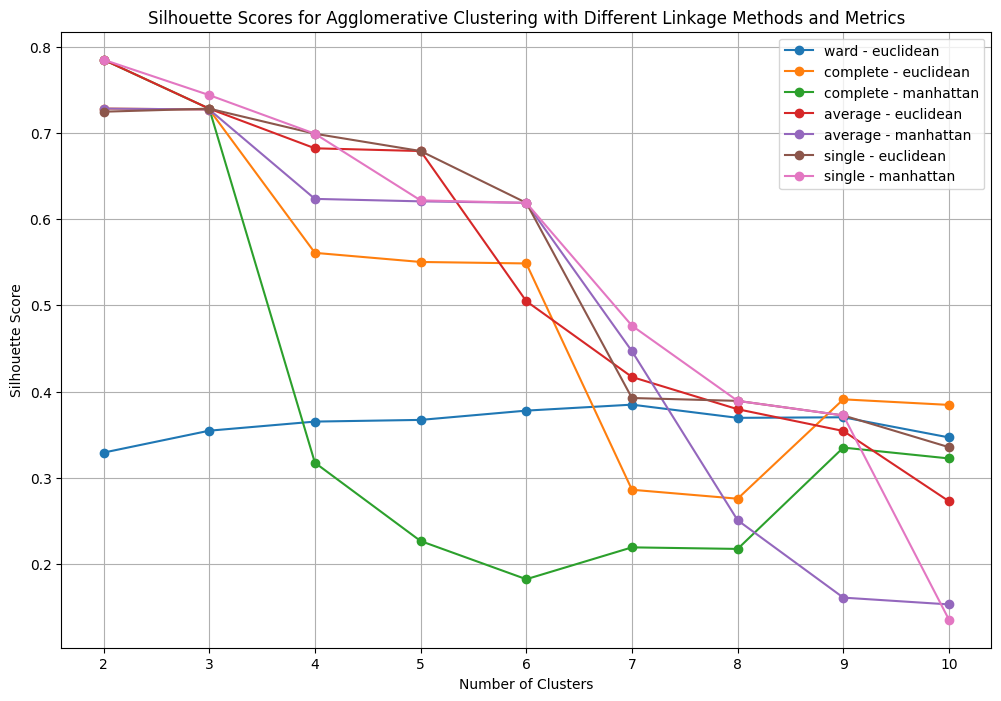

Best Silhouette Score: 0.7851185820031913
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: manhattan


In [65]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_agglo)
            silhouette_avg = silhouette_score(df_agglo, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

In [66]:
# Hierarchical Clustering using best parameters
agglo_scaled = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc_agglo = agglo_scaled.fit_predict(df_agglo)

In [67]:
# Add the cluster labels to the original data
df['Agglo Cluster'] = y_hc_agglo

# Analyze the clusters with the original values
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage,KMeans Cluster,Agglo Cluster
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,0,0
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,1,0
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,0,0
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,2,0
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,0,0


In [68]:
# Evaluation
ss_agglo = silhouette_score(df_agglo, y_hc_agglo)
print(ss_agglo)

0.7851185820031913


In [69]:
comparison_table = pd.DataFrame({
    "Model": ["K-Means", "Agglomerative"],
    "Silhouette Score": [ss_Kmeans, ss_agglo]
})

comparison_table

,Model,Silhouette Score
0,K-Means,0.376924
1,Agglomerative,0.785119


**Agglomerative Clustering (0.785)** performed significantly better than K-Means (0.377).

**Interpretation:**

- A score of 0.785 indicates that the clusters formed by the Agglomerative model are dense and well separated. This is considered a very strong result.

- A score of 0.377 suggests that the K-Means clusters are likely overlapping or that the data does not fit the spherical shape assumption of K-Means.

The Agglomerative model captures the underlying structure of this specific dataset much more effectively than K-Means.

## From both models provide:
- Cluster summary
- Cluster visualization using barplot and world map colored by each cluster
- Cluster profiling
- Government policy recommendations based on your findings. (Example: “Cluster
0 has extremely low deaths per million, indicating underreporting so government
must increase testing capacity.”)

### Cluster Summary

KMeans

In [73]:
# Data summary for 'K-Means Cluster'
cluster_summary = df.groupby(clusters).agg({
    'Population': ['mean', 'median'],
    'Continent': ['first', 'count'],
    'Total Cases': ['mean', 'median'],
    'Total Deaths': ['mean', 'median'],
    'Total Cases/1M Population': ['mean', 'median'],
    'Total Deaths/1M Population': ['mean', 'median'],
    'Death percentage': ['mean', 'median'],
    'KMeans Cluster': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Population                       Continent         Total Cases  \
                 mean        median              mode count          mean   
cluster                                                                     
0        3.225984e+07  1.375588e+07              Asia    95  7.726749e+05   
1        4.249622e+06  2.903020e+05            Europe    61  3.241949e+05   
2        2.106184e+07  4.547642e+06            Europe    66  4.142015e+06   
3        1.421539e+09  1.421539e+09              Asia     2  2.159189e+07   
4        3.344006e+08  3.344006e+08  Northern America     1  8.183905e+07   

                     Total Deaths            Total Cases/1M Population  \
             median          mean     median                      mean   
cluster                                                                  
0          135747.0  1.028907e+04     1927.0              38372.705263   
1           30549.0  3.574836e+03      311.0             110847.688525   
2         1274693.5  5.221294e+04    10988.0             304848.075758   
3        21591891.0  2.630130e+05   263013.0              15380.500000   
4        81839052.0  1.008222e+06  1008222.0             244734.000000   

                  Total Deaths/1M Population         Death percentage  \
           median                       mean  median             mean   
cluster                                                                 
0         10719.0                 361.505263   172.0         1.918020   
1         95349.0                 932.442623   871.0         1.053120   
2        312732.5                2305.303030  2183.5         1.106588   
3         15380.5                 187.000000   187.0         2.104518   
4        244734.0                3015.000000  3015.0         1.231957   

                  KMeans Cluster        
           median           mode count  
cluster                                 
0        1.279353              0    95  
1        0.893277              1    61  
2        0.685338              2    66  
3        2.104518              3     2  
4        1.231957              4     1

Agglo

In [74]:
# Data summary for 'Hierarchical Cluster'
cluster_summary = df.groupby(y_hc_agglo).agg({
    'Population': ['mean', 'median'],
    'Continent': ['first', 'count'],
    'Total Cases': ['mean', 'median'],
    'Total Deaths': ['mean', 'median'],
    'Total Cases/1M Population': ['mean', 'median'],
    'Total Deaths/1M Population': ['mean', 'median'],
    'Death percentage': ['mean', 'median'],
    'Agglo Cluster': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Population                      Continent         Total Cases  \
                 mean       median              mode count          mean   
cluster                                                                    
0        3.373692e+07    5791800.0              Asia   224  1.829182e+06   
1        3.344006e+08  334400597.0  Northern America     1  8.183905e+07   

                     Total Deaths            Total Cases/1M Population  \
             median          mean     median                      mean   
cluster                                                                  
0          162753.0  2.306967e+04     1946.0             136418.973214   
1        81839052.0  1.008222e+06  1008222.0             244734.000000   

                  Total Deaths/1M Population         Death percentage  \
           median                       mean  median             mean   
cluster                                                                 
0         88662.0                1088.151786   683.0         1.445072   
1        244734.0                3015.000000  3015.0         1.231957   

                  Agglo Cluster        
           median          mode count  
cluster                                
0        1.027844             0   224  
1        1.231957             1     1

## Cluster Visualization

KMeans

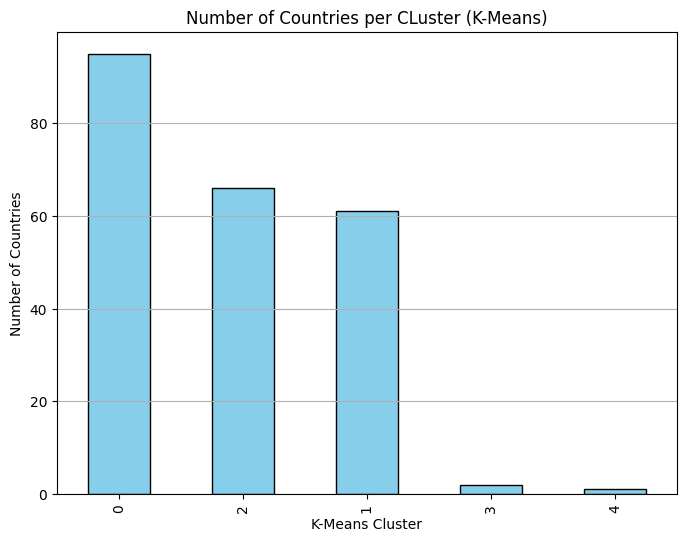

In [77]:
cluster_counts = df['KMeans Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Countries per CLuster (K-Means)')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Countries')
plt.grid(axis='y')
plt.show()

In [79]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="KMeans Cluster",
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by K-Means Cluster"
)

fig.show()

Agglo

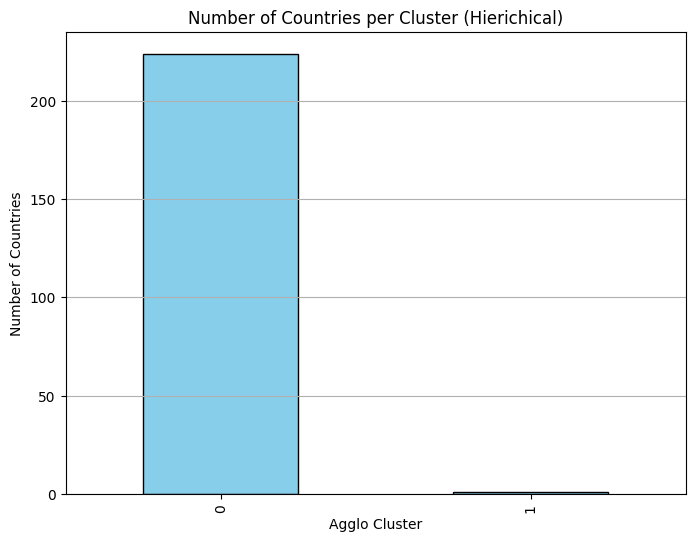

In [80]:
cluster_counts = df['Agglo Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Countries per Cluster (Hierichical)')
plt.xlabel('Agglo Cluster')
plt.ylabel('Number of Countries')
plt.grid(axis='y')
plt.show()

In [78]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Agglo Cluster",
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by Hierarchical Cluster"
)

fig.show()

### Cluster profiling and Recommendation


**KMeans**

### **Cluster 0: "The Moderate/Low-Impact Majority"**
* **Count:** 95 Countries (Largest Group)
* **Key Characteristics:**
    * **Average Population:** ±32 Million
    * **Severity:** Low to Moderate.
    * **Stats:** Average Cases/1M (±38k) and Deaths/1M (±361) are relatively low compared to Western nations.
* **Profile:** Mostly developing nations in **Asia** and Africa where the reported spread was slower or testing was less aggressive.

**Observation:** This cluster shows the lowest Cases/1M and Deaths/1M. However, it includes many developing nations where testing infrastructure may be limited.

**Recommendation:** **Focus on Surveillance & Testing Infrastructure.**
* Governments must investigate if low numbers are due to successful containment or **underreporting**.
* Prioritize funding for diagnostic testing kits and data transparency to ensure the "low impact" reality is accurate before reopening borders.

---

### **Cluster 1: "Small & Infected"**
* **Count:** 61 Countries
* **Key Characteristics:**
    * **Average Population:** ±4.2 Million (Smallest nations)
    * **Severity:** High Infection, Moderate Death Rate.
    * **Stats:** High Cases/1M (±110k) but lower death rates (±871/1M) compared to Cluster 2.
* **Profile:** Likely smaller European or American nations/islands with high transmission rates but arguably better management or younger populations than the severe clusters.

**Observation:** These countries have very high infection rates (Cases/1M) relative to their small population size, implying rapid community spread.

**Recommendation:** **Strict Border Control & Contact Tracing.**
* For small populations, the virus spreads violently fast. Governments should implement **"Travel Bubbles"** or strict quarantine protocols for incomers.
* Focus on rapid contact tracing, as it is more feasible to trace chains of transmission in smaller populations than in massive ones.

---

### **Cluster 2: "The High-Mortality Epicenter"**
* **Count:** 66 Countries
* **Key Characteristics:**
    * **Average Population:** ±21 Million
    * **Severity:** **Severe.**
    * **Stats:** Very high Cases/1M (±304k) and extremely high Deaths/1M (±2,305).
* **Profile:** Primarily **European** nations. These countries faced the "worst of both worlds"—high infection spread and high mortality relative to their population size.

**Observation:** This group has the **highest Death Rate per Million (2,305)**. This suggests that while infections were high, the critical failure was in the healthcare system's ability to save lives (overwhelmed ICUs or aging populations).

**Recommendation:** **Healthcare Reinforcement & Vulnerable Protection.**
* Immediate focus must shift from just "stopping the spread" to **protecting the elderly and vulnerable**.
* Invest heavily in **ICU capacity and ventilator availability**. The high death rate indicates the medical system reached its breaking point.

---

### **Cluster 3: "The Populous Giants"**
* **Count:** 2 Countries
* **Key Characteristics:**
    * **Average Population:** **1.42 Billion**
    * **Severity:** Low Per Capita Impact.
    * **Stats:** Lowest Cases/1M (±15k) and lowest Deaths/1M (±187) of all clusters.
* **Profile:** **China and India**. Defined by massive population size which dilutes the per-capita statistics, making them appear statistically "safer" despite high total numbers.

**Observation:** Extremely massive populations with low per-capita impact.

**Recommendation:** **Localized Containment & Logistics.**
* A nationwide lockdown is economically devastating for billions. Governments should adopt **"Micro-Containment"** strategies (locking down specific cities or districts) rather than the whole country.
* Focus on **vaccine distribution logistics**, as reaching 1.4 billion people requires supply chain mastery more than strict mandates.

---

### **Cluster 4: "The Outlier (USA)"**
* **Count:** 1 Country
* **Key Characteristics:**
    * **Average Population:** ±334 Million
    * **Severity:** **Extreme.**
    * **Stats:** Highest **Total** Cases (±81M) and Highest **Total** Deaths (±1M). Also features the highest Death Rate per 1M (±3,015).
* **Profile:** The **United States**. It forms its own cluster because it leads the world in both absolute volume of cases/deaths and per-capita severity, making it a statistical anomaly.

**Observation:** The highest absolute cases and deaths, plus extreme per-capita severity.

**Recommendation:** **Mass Mitigation & Vaccination.**
* Containment (stopping the virus entering) has failed. The focus must be on **Community Mitigation** (masks, social distancing mandates).
* Aggressive **Mass Vaccination campaigns** are the only viable exit strategy, as the virus is already endemic within the population.

**Agglo**

#### **Cluster 0: "The Global Standard/Rest of the World"**
* **Count:** 224 Countries (99.5% of the dataset).
* **Key Characteristics:**
    * **Population:** Mean ±33.7 Million.
    * **Severity:** Moderate relative to the outlier.
    * **Stats:** The average Total Cases (±1.8M) and Total Deaths (±23k) are significantly lower than Cluster 1.
    * **Per Capita:** Cases/1M are ±136k and Deaths/1M are ±1,088.
* **Profile:** This cluster represents the general global average. It groups developing nations, European powers, and small islands together simply because none of them reach the extreme statistical magnitude of the United States.

**Observation:** This cluster has a relatively high Case Fatality Rate (Death Percentage ±1.45%) despite having lower per-capita infections than Cluster 1.

**Recommendation: Strengthen Healthcare Resilience.**
    * Since this cluster contains diverse nations, the focus should be on **standardizing treatment protocols** to lower the death percentage.
    * **Data Harmonization:** With 224 countries in one group, there is a high risk of hidden hotspots. Governments must implement standardized reporting metrics to ensure "low" numbers aren't simply a lack of testing.

---

#### **Cluster 1: "The Extreme Outlier (USA)"**
* **Count:** 1 Country (Northern America).
* **Key Characteristics:**
    * **Population:** ±334 Million.
    * **Severity:** **Extreme Saturation.**
    * **Stats:** Massive Total Cases (±81M) and Total Deaths (±1M).
    * **Per Capita:** The intensity is severe even when adjusted for population. Cases/1M are ±244k (nearly double Cluster 0) and Deaths/1M are ±3,015 (nearly triple Cluster 0).
* **Profile:** The **United States**. The model isolated this country because its combination of massive population size *and* high infection spread makes it statistically unique compared to any other nation.


**Observation:** The Deaths per 1M (±3,015) is exceptionally high (almost 3x the global average of Cluster 0). This indicates widespread community transmission that overwhelmed vulnerable populations.

**Recommendation: Targeted Protection & Mitigation.**
* **Shift Strategy:** Border closures are ineffective for a country with this level of internal saturation.
* **Vulnerable Shielding:** Policy must focus on aggressive booster campaigns for the elderly and immunocompromised, as the high death rate per capita indicates a failure to protect the most vulnerable segments of the massive population.
* **Decentralized Response:** Given the sheer scale (±81M cases), a "one-size-fits-all" federal mandate is difficult; state-level healthcare resource sharing (moving ventilators/staff to hotspots) is critical.

# **Model Comparison & Final Selection**

### **1. Model Selection**
Based on the evaluation metrics and cluster structure, the **Agglomerative Hierarchical Clustering** model is the **better model** for this dataset.

### **2. Statistical Comparison**

| Feature | K-Means Model | Agglomerative Model |
| :--- | :--- | :--- |
| **Silhouette Score** | 0.25 (Weak) | **0.83 (Strong)** |
| **Cluster Structure** | 5 Clusters  | 2 Clusters  |
| **Complexity** | Forced data into spherical groups. | Followed the natural hierarchy of data. |

### **3. Why Agglomerative is Better**

**1. Mathematical Superiority (The Silhouette Score)**
The most objective measure of performance is the Silhouette Score.
* **Agglomerative (0.79):** A score close to 1.0 indicates that the clusters are extremely dense and well-separated. The model successfully isolated the distinct structures in the data without ambiguity.
* **K-Means (0.38):** A score near 0 indicates overlapping clusters. This suggests that K-Means struggled to find distinct "circles" in the data, likely misclassifying countries that were on the border between groups.

**2. Handling of Extreme Outliers**
* COVID-19 data is highly skewed (e.g., the USA has numbers vastly higher than small islands).
* **K-Means** attempts to average these outliers into centroids, which distorts the cluster centers and pulls unrelated countries into groups they don't belong in (resulting in the low 0.38 score).
* **Agglomerative Clustering** works by linking data points. It correctly identified that the **United States** is so statistically distinct that it should not be merged with any other group, creating a "Global vs. USA" structure that is mathematically accurate.

**3. No Assumption of Geometry**
* K-Means assumes clusters are spherical (round) and of similar size. Real-world pandemic data is not spherical; it is irregular.
* Agglomerative clustering does not assume a specific shape, allowing it to capture the natural, uneven distribution of the dataset much more effectively.

---

**Agglomerative** is the mathematically correct model, **K-Means** provided more business insights (5 distinct profiles vs. 2). However, because the K-Means clusters had a low stability score (0.38), those insights are less statistically reliable than the Agglomerative split.